# 02- Snomed2Vec - Use Model - Methods & Class. V.01.

### A new Approach Snomed-CT with word embedding - Snomed2Vec - Model.
### Introducción:
**Autor:** Ignacio Martinez Soriano. Data Scientist. Hospital Universitario "Rafael Mendez" & Medlab Media Group.

**Coautores:** 
* Juan Luis Castro Peña. Dept Ciencias de la computacion e Inteligencia Artificial. Universidad de Granada.
* Jesualdo Fernandez Breis. Dept. Informática y Sistemas. Universidad de Murcia.
* Ignacio San Román. Dept. Chief Artificial Intelligence Officer . Medlab Media Group.
* Adrian Alonso Barriuso. Research Technical Lead. Medlab Media Group.

**Fecha:** 28/01/2019.<br>

## 1. Introducción:
Creación de un nuevo enfoque **Snomed2Vec**<br>
Diseño de una herramienta para obtener los conceptos clínicos dentro del texto libre de cualquier informe médico. Asociándole el código mas aproximado, del concepto Snomed-CT. Utilizando **"Word Embeddings"** Devolviendo la lista de conceptos Snomed-CT, que aparecen en una frase y sus relaciones con otras entidadades clínicas.<br>

**Generación Modelo final Snomed2Vec:**

Hemos generado dos modelos:
* Uno basado en un dominio local, (Informes de Alta + Descripciones Términos Snomed-CT)
* Otro basado en un dominio general, (Artículos de Wikipedia + Descripciones Términos Snomed-CT)

Basándonos en los vectores de ese Modelo, aplicamos los vectores de las palabras para generar el Vector final del  Término de la descripción de Snomed-CT:<br>
Utilizamos el Modelo generado con Word2Vec, y lo aplicamos a la descripción de Snomed-CT, generando el siguiente vector asociado a la descripción **[d]**<br>
Siendo $ V(w_i) $ el Vector asociado a la palabra $ w_i $, según el modelo Word2Vec $ M $.<br>
* $ Descripcion-Snomed-CT(d) = (w_1,w_2,...,w_n),=> V[d] = \sum_{i=1}^{n}v[w_{i}]=v[w_{1}]+v[w_{2}]+...+v[w_{n}] $

El Modelo **Snomed2Vec** final: quedaria así:

* Un registro para cada concepto con la siguiente estructura:<br>
**| Id-Concept | Jerarquia | Descripcion | [Vector de la Descripción] |**

### Métodos implementados:

Implementamos una version de **Most_Similar()** para obtener los Conceptos similares de  **Snomed-CT**<br>

* **Mas_Similar('frase','clase mas proxima')**
*  Entrada: **frase**, **clase mas proxima**, se refiere a si se quiere buscar, los conceptos mas cercanos, según la jerarquía de Snomed-CT.
*  Salida: (Lista de conceptos, nombrados en la **frase**, proporcionando los mas cercanos según clase buscada)

## 2. Snomed-CT:
Utilizamos la Ontología **Snomed-CT**, como Terminología clínica,para identificar los conceptos y codificarlos.<br>

### Estructura Lógica:

**Conceptos:**<br>
Cada concepto representa un significado clínico único, al que se referencia con un identificador numérico único de SNOMED CT.

**Descripciones:**<br>
A cada concepto se asigna un conjunto de descripciones textuales. Éstas constituyen la forma legible de un concepto. Se utilizan dos tipos de descripciones para representar cada concepto - Descripción completa (FSN, por Fully specified name en inglés) y Sinónimo.

**Relaciones:**<br>
Una relación representa una asociación entre dos conceptos. Las relaciones se utilizan para definir lógicamente el significado de un concepto de manera que pueda procesarlo un ordenador. Un tercer concepto, denominado el tipo de relación (o atributo), se utiliza para representar el significado de la asociación entre el concepto de origen y el de destino. En SNOMED CT existen diferentes tipos de relaciones.

**Jerarquías:**<br>
Nivel superior con una breve descripción del contenido representado en su rama de la jerarquía.

>**|Hallazgo clínico|** representa el resultado de una observación, una evaluación o un juicio clínico e incluye a los conceptos utilizados para representar **diagnósticos**.<br>
**|Procedimiento|** representa actividades que se llevan a cabo durante la atención de la salud.<br>
**|Situación con contexto explícito|** representa hallazgos clínicos y procedimientos que aún no han ocurrido, (por ejemplo,|antecedente de infarto de miocardio|).<br>
**|Entidad observable|** representa una pregunta o una evaluación de las que se puede obtener una respuesta o un resultado (por ejemplo, |presión arterial sistólica|, |color del iris|, |género|). <br>
**|Estructura corporal|** representa estructuras anatómicas normales y anormales.<br>
**|Organismo|** representa organismos relevantes para la medicina humana y veterinaria.<br>
**|Sustancia|** representa sustancias en general, los constituyentes químicos de los productos farmacéuticos/biológicos, sustancias corporales, sustancias alimenticias y diagnósticas. <br>
**|Producto farmacéutico / biológico|** representa los productos farmacológicos (por ejemplo, |amoxicilina 250 mg, cápsula|, |paracetamol + codeína comprimido|). <br>
**|Espécimen|** representa entidades que se obtienen (por lo general del paciente) para realizar exámenes o análisis.<br>
**|Concepto especial|** representa conceptos que no desempeñan ningún papel en la lógica formal del modelo conceptual de la terminología, pero que pueden ser útiles para casos de uso específicos. <br>
**|Objeto físico|** representa objetos físicos naturales y fabricados por el hombre.<br>
**|Fuerza física|** representa fuerzas físicas que pueden desempeñar un papel como mecanismos de lesión (por ejemplo |fricción|, |radiación|, |corriente alterna|).<br>
**|Evento|** representa acontecimientos, con exclusión de procedimientos e intervenciones, (por ejemplo, |terremoto|). <br>
**|Ambiente o localización geográfica|** representa tipos de ambientes, así como lugares con nombres propios, como países, estados y regiones.<br>
**|Contexto social|** representa condiciones sociales y circunstancias significativas para la atención de la salud.<br>
**|Estadificaciones y escalas|** representa escalas de evaluación y sistemas de estadificación tumoral. <br>
**|Calificador|** representa los valores para algunos de los atributos de SNOMED CT, cuando esos valores no son subtipos de otros conceptos de nivel superior (por ejemplo, |izquierdo|, |resultado anormal|, |severo|).<br>
**|Elemento de registro|** representa contenido creado para brindar información a otras personas sobre eventos de registro o estado de asuntos (por ejemplo, |registro llevado por el paciente|, entrada de registro|, |sección correspondiente a antecedentes familiares|).<br>
**|Componente del modelo de SNOMED CT|** contiene los metadatos que se utilizan para la publicación de SNOMED CT. <br>


## 3. Generación de los Modelos de Espacio Vectorial, para palabras:

Para generar el modelo vectorial de palabras embebidas utilizamos **Word2Vec**, generado por Mikolov et al.<br>
>Tomas Mikolov, Kai Chen, Greg Corrado, and Jeffrey Dean. 2013a. [Efficient estimation of word representations in vector space.](https://arxiv.org/abs/1301.3781) In Proceedings of ICLR Workshop


**Word2Vec**, es un framework semántico que utiliza una red neuronal superficial de una sola capa oculta, para aprender la representación de la palabra según su contexto.<br>
La idea principal es identificar el significado de las palabras, por su  contexto. Esta idea fue desarrollada por Mikolov et al. generando una representacion distribuida de palabras en un espacio vectorial. Permitiendo la agrupación de palabras similares.
Para generar los Modelos del espacio vectorial de palabras, utilizamos la libreria Python **gensim:**<br>
>[*REHUREK, R., AND SOJKA, P. Software framework for topic modelling with large corpora. New Challenges For NLP Frameworks Programme (May 2010), 45–50.*](https://github.com/RaRe-Technologies/gensim)

Los parámetros utilizados para entrenar la red neuronal, han sido:
* El modelo elegido ha sido Skip-Gram.
* Tamaño del vector. size=300.
* Tamaño del a ventana de contexto. Window=8
* Mínimas palabras de estudio. min_count=1

**Se ha generado los siguientes Modelos:**

1. Modelo Dominio local, ampliado con las descripciones de Snomed-CT:<br>
Se genera un modelo de espacio vectorial, con **Word2Vec**, basado en los Informes de Alta de urgencias y se añade las descripciones de los términos de Snomed-Ct, para entrenar el modelo.
***(SkipGram, vector size=300, windows= 8, Negative=0, min=1)***

1. Modelo Dominio general, Wikipedia, ampliado con descripciones Snomed-CT:<br>
Se genera un modelo de espacio vectorial, con **Word2Vec**, basado en los datos de la wikipedia en español, ampliada con las descripciones de Snomed-CT.
***(SkipGram, vector size=300, windows= 8, Negative=0, min=1)***

**Modelo Final:**
![Snomed2Vec-Model02](./imagesNB/Snomed2Vec-Model02.png "Modelo Snomed2Vec")

## 4. Generación Vector para las frases:

Una vez generado el modelo elegido, se aplica a las descripciones de Snomed-CT, utilizando un DataSet construido específicamente para este framework. Generando el nuevo modelo **Snomed2Vec**.

El DataSet construido está compuesto por los siguientes campos **(id-Concepto, Jerarquia, descripción Concepto)**
Para identificar que tipo de concepto estamos seleccionando, se ha utilizado la jerarquia superior del concepto de Snomed-CT, al que pertenece.

**Generación Modelo final:**<br>
Utillizando los modelos anteriores, se aplica a la descripción del concepto, para generar el vector de la descripción:

Siendo $ V(w_i) $ el Vector asociado a la palabra $ w_i $, según el modelo Word2Vec $ M $.<br>
* $ Descripcion-Snomed-CT(d) = (w_1,w_2,...,w_n),=> V[d] = \sum_{i=1}^{n}v[w_{i}]=v[w_{1}]+v[w_{2}]+...+v[w_{n}] $

Obteniendo un modelo final **Snomed2Vec**, compuesto por:
**(id-Concept | Jerarquia | Descripción | vecSnom(d) )**:
![Estructura Snomed2Vec](./imagesNB/SnomedWork.png "Modelo Snomed2Vec")


## 5. Métodos,  cálculo similaridad y mas_similar():<br>
Para calcular los conceptos similares, se aplica la distancia del coseno, entre los vectores de cada palabra o frase:<br>
![Distancia Coseno Similaridad](./imagesNB/cosine-similarity.png "Modelo Snomed2Vec")

### * Snomed2Vec.mas_similar(texto,clase,num_conceptos):*<br>
**Entrada:**<br>
*texto*=frase secuencia palabras<br>
*clase*= Tipo de concepto, para sacar los más proximos, respecto a la entrad de texto.<br>
**Sallida:** grado de similaridad = distancia del coseno, entre los vectores de V[texto] y v[Todas Desc Snomed-CT]

### * snomed2vec_load (type = 0,1):*
Carga del Modelo de espacio vectorial inicial:

1. Modelo type = 0 , generado por (Informes de ALta + Descripciones Términos Snomed-CT) Modelo dominio local.
1. Modelo type = 1 , generado por (Articulos Wikipedia Español + Descripciones Términos Snomed-CT) Modelo dominio Global.

## 6. Resultados de la investigación:
* DataSet de Snomed-CT, compuesto por los conceptos con su jerarquia superior, y sus sinónimos.
* Modelo Wikipedia en Español, entrenado con word2vec y normalizado. (palabras en minúsculas). Tamañao 300 y con Skip-Gram.
* Modelos Snomed2Vec, entrenados, según lso modelos de espacios vectorial, elegidos.
* framework, para obtner los conceptos y relaciones, según una frase de entrada. (Por ejemplo un diagnóstico principal).

## 7. Data sources, Space vector Models:
** Corpus Gold:**

## 8. Evaluación y medidas utilizadas:


## Final notes:
This documentation is part of my PH.D.Thesis and share to improve this new approach.
For any comments or help needed with how to test *Snomed2Vec* tool, you can write to: ignacio.martinez@carm.es



### Carga de librerias necesarias:

In [1]:
# Carga de librerias. Versiones en Portatil
# numpy 1.13.3
# pandas 0.20.3
# gensim 2.30
import sys
#p= r'D:\Doctorado\codigo'
p='/media/nacho/DatosHD/Doctorado/CBMS2019/codigo'
sys.path.append(p)

#import unicodedata
import pandas as pd
import numpy as np
from numpy import exp, log, dot, zeros, outer, random, dtype, float32 as REAL,\
    double, uint32, seterr, array, uint8, vstack, fromstring, sqrt, newaxis,\
    ndarray, empty, sum as np_sum, prod, ones, ascontiguousarray, vstack

from six import iteritems, itervalues, string_types
from six.moves import xrange
from gensim import utils, matutils

from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

import logging
import IPython.display as disp

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
pd.set_option('max_colwidth', 100) #para que se impriman las columnas con mayor anchura en el notebook

Using TensorFlow backend.


## 1. Función Snomed2vec_Model, seleccion del Modelo inicial:
**Snomed2Vec.load(typeModel)**

### 1.1 Modelo de Espacio de vectores aplicado a las descripciones de Snomed:

Dependiendo del Modelo elegido, se utilizará,para generer los vectores de cada descripción de Snomed.

El vector generado para la descripción **[d]** está formado  por:
* $ Descripcion (d) = (w_1,w_2,...,w_n), V[d] = \sum_{i=1}^{n}v[w_{i}]=v[w_{1}]+v[w_{2}]+...+v[w_{n}] $



### 1.2. Carga Datos DataFrame de Snomed-CT. Snomed2Vec.load(typeModel).
Carga del Modelo Snomed2Vec, Entrenado según el modelo elegido.

Obtenemos el modelo final:<br>
** Carga de Datos Snomed IdConcepto, Jerarquias, TokenTerm, Vector(Segun Modelo):**<br>
Modelo generado en el Notebook 20-02.Snomed-CT<br>
** Cargar el modelo previamente generado en formato numpy.**<br>
fichero *Snomed2Vec-SK300-IA-Op2.npy*<br>

In [2]:
# Carga del Modelo elegido, según de la funcion snomed2vec.load.
# Utilzia el modelo entrenado Word2Vec, (Word vectors)y el modelo generado final Snomed2Vec.(Sentence vectors)

def snomed2vec_load(typeModel=0):
    """ 
    Dependiendo del parámetro typeModel, se carga los siguientes modelos preentrenados (Word2Vec):
    1. typeModel=0 -> Modelo entrenado con los (Informes de ALta de urgencia + Descripcion Snomed-CT)
    2. typeModel=1 -> Modelo entrenado con wikipedia en español + Descripción Terminos Snomed-CT.

    """
    if typeModel==0: #Modelo Informes de Alta + Descripciones Snomed-CT
        print('Modelo entrenado con los Informes de Alta de Urgencias + Descripciones de Snomed-CT')
        fich = '/Models/SKs300w8m1-InfAltSnomed.txt'
        fSnomed = '/Models/Snomed2Vec-SK300-IA-Snomed.npy'
        
    elif typeModel==1: #Modelo Wikipedia
        print('Modelo entrenado con la Wikipedia en Español')
        fich = '/Models/SKs300w5m1-wikipedia.txt'
        fSnomed = '/Models/Snomed2Vec-CBoW300-Wiki-Op3.npy'
    
    f = p+fich
    fSno = p+fSnomed
    cols=['idConcept','jerarquia','corpusTerm','vecSnom']
    print('Carga del Modelo Snomed2Vec tipo:(%s)' % str(typeModel))
    with open(fSno,'rb') as np_file:
        data = np.load(np_file)
    
    return KeyedVectors.load_word2vec_format(f, binary=False), pd.DataFrame(data, columns=cols)

### 2. Carga del Modelo (dominio local InfAltas+Snomed) typeModel=0

In [3]:
# Ejemplo de Carga del modelo type=0
w2vModel, SnomedWork = snomed2vec_load(0)

Modelo entrenado con los Informes de Alta de Urgencias + Descripciones de Snomed-CT
Carga del Modelo Snomed2Vec tipo:(0)


2019-02-04 17:18:27,881 : INFO : loading projection weights from /media/nacho/DatosHD/Doctorado/CBMS2019/codigo/Models/SKs300w8m1-InfAltSnomed.txt
2019-02-04 17:19:59,323 : INFO : loaded (538631, 300) matrix from /media/nacho/DatosHD/Doctorado/CBMS2019/codigo/Models/SKs300w8m1-InfAltSnomed.txt


### Comprobación del Modelo Snomed2Vec. Cargado:

In [4]:
# Comprobacion del dataframe:

SnomedWork.head()

,idConcept,jerarquia,corpusTerm,vecSnom
0,102002,Sustancia,"[hemoglobina, okaloosa]","[0.503108, 0.466876, -0.0276602, -0.234006, -0.116602, 0.484161, 0.125, -0.351791, 0.168337, -0...."
1,102002,Sustancia,"[hb, 48, cd7, leu, arg]","[-0.301794, -0.120972, 0.0392014, 0.748237, 0.531802, -0.969592, 0.567389, -1.43454, 0.598673, -..."
2,103007,Organismo,"[virus, fibroma, ardillas]","[1.08219, -0.860717, 0.460997, 0.467138, -0.109274, 0.35905, 0.0495269, -1.52099, 0.485955, -0.6..."
3,104001,Procedimiento,"[escision, lesion, rotula]","[0.956222, 0.32638, 0.567415, 0.278348, -0.473122, 1.32149, 0.381964, -0.338385, -0.179837, -0.3..."
4,104001,Procedimiento,"[escision, local, lesion, o, tejido, rotula]","[1.09046, 1.19666, 0.137113, 1.16608, -1.54469, 1.88294, 0.745489, -1.53078, 0.679535, -0.650022..."


In [11]:
# Comprobación del Modelo
#w2vModel.vocab

### 2.1 Proceso temporal para añadirle el concepto con su jerarquia:

In [5]:
# Creación de una columan nueva con el idConcepto+Terminos+Jerarquia
def unir3(row):
    id = str(row.idConcept)
    strTerm = ' '.join(row.corpusTerm)
    jer = str(row.jerarquia)
    buff = row.idConcept + '|' + strTerm +'|'+row.jerarquia
    return buff

In [6]:
SnomedWork['concept'] = SnomedWork[['idConcept','jerarquia','corpusTerm']].apply(unir3, axis=1)

In [7]:
SnomedWork.head()

,idConcept,jerarquia,corpusTerm,vecSnom,concept
0,102002,Sustancia,"[hemoglobina, okaloosa]","[0.503108, 0.466876, -0.0276602, -0.234006, -0.116602, 0.484161, 0.125, -0.351791, 0.168337, -0....",102002|hemoglobina okaloosa|Sustancia
1,102002,Sustancia,"[hb, 48, cd7, leu, arg]","[-0.301794, -0.120972, 0.0392014, 0.748237, 0.531802, -0.969592, 0.567389, -1.43454, 0.598673, -...",102002|hb 48 cd7 leu arg|Sustancia
2,103007,Organismo,"[virus, fibroma, ardillas]","[1.08219, -0.860717, 0.460997, 0.467138, -0.109274, 0.35905, 0.0495269, -1.52099, 0.485955, -0.6...",103007|virus fibroma ardillas|Organismo
3,104001,Procedimiento,"[escision, lesion, rotula]","[0.956222, 0.32638, 0.567415, 0.278348, -0.473122, 1.32149, 0.381964, -0.338385, -0.179837, -0.3...",104001|escision lesion rotula|Procedimiento
4,104001,Procedimiento,"[escision, local, lesion, o, tejido, rotula]","[1.09046, 1.19666, 0.137113, 1.16608, -1.54469, 1.88294, 0.745489, -1.53078, 0.679535, -0.650022...",104001|escision local lesion o tejido rotula|Procedimiento


In [8]:
print('Comprobacion de tamaño Modelo Espacio Vectorial (1)- 516211 - %d' % len(SnomedWork))

Comprobacion de tamaño Modelo Espacio Vectorial (1)- 516211 - 516211


## 3. Métodos Snomed2Vec.Mas_similar() y Snomed2Vec.Similarity.

### 3.1. Pruebas del método Snomed2vec.Most_similar():
Implementacion método Most_Similar para Snomed2Vec. Basado en la implementación de gensim Word2Vec.

** Nueva Versión init_Sims para Snomed2Vec:(init_vars)**

Se define variables globales, para la generación utilización del espacio vectorial adaptado SNomed2Vec.<br>
Matriz tamañp global con el vocabulario. *"vocab* y con el tamaño del vector, segń el Modelo w2V.<br>


In [9]:
# Definiciones necesarias:
# Definir las siguientes varibles globales.
# Matriz formada por el tamaño global del vocabulario "vocab" y el tamaño "size" del vector de la palabra

#Entrada: Se le pasa el dataframe SnomedWork


def init_vars(data):
    vector_size = len(data['vecSnom'][0])
    vocab_size = len(data['vecSnom'])
    print(vector_size)
    print(vocab_size)
    
    logging.info("precomputing L2-norms of word weight vectors")
    
    index2word = data['concept'].tolist() # map from a word's matrix index (int) to word (string)
    
    syn0 = np.array(data['vecSnom'].tolist(), dtype=REAL)
    syn0[np.isnan(syn0)] = 0.0
    
    syn0norm = zeros((vocab_size, vector_size), dtype=REAL)
    np.seterr(divide='ignore', invalid='ignore')
    
    syn0norm = (syn0 / sqrt((syn0 ** 2).sum(-1))[..., newaxis]).astype(REAL)
    
    
    return syn0, index2word, syn0norm

**Inicialización matrices:**

* **syn0**.<br>
* **index2word**.<br>
* **syn0norm**.<br>

In [10]:
syn0, index2word, syn0norm = init_vars(SnomedWork)

2019-02-04 17:28:36,376 : INFO : precomputing L2-norms of word weight vectors


300
516211


### 3.2 Crear Vector para cada token de la frase.
Generación de los vectores de los tokens de cada frase.<br>
* Funcion **vectorSnomed(frase, Model, size)**, genera un vector por cada token de la frase.
    * Entrada: lista de tokens de la **frase**, **model**, **size**, tamaño del vector generado según modelo W2V (300 o 100)
    * Salida: lista con los vectores de cada token, de la frase. $$(V[p]=v[tk_{1}]+v[tk_{2}]+...+v[tk_{n}])$$<br>

* Funcion: **mas_similar(positive=[], model=w2vModel, topn=10)**
    * Entrada: **listGramas**, lista de n-gramas generados, **model**, tamaño del vector, según modelo W2V. **topn**, número máximo de palabras devueltas.(mas similares)
    * Salida: lista de palabras devueltas, mas similares, con su distancia. (distancia coseno)

* Funcion ****** para crear el vector formado, por la suma de los vectores de las palabras de una frase.<br>
La **frase** se pasa como una lista de palabras(lstgrams).

In [11]:
def vectorSnomed(lstgrams,model,size):
    output=[]
    buffer=np.zeros((size,), dtype=np.float32)
    for item in lstgrams:
        try:
            buffer = buffer + model.word_vec(item)
        except:
            buffer = buffer + np.zeros((size,), dtype=REAL)
    return buffer

Función **mas_similar** , se aplica la distancia del coseno,a la frase pasada como parámetro en el espacio vectorial **Snomed2Vec**  para generar una lista ordenada, de palabras simliras, según su distancia de mas cerca a mas lejos.

In [12]:
def mas_similar(positive=[], model=w2vModel, topn=10):
    
    vector=vectorSnomed(positive,model,300)
    vectorNorm = (vector / sqrt((vector ** 2).sum(-1))[..., newaxis]).astype(REAL)
    
    mean = []
    mean.append(vectorNorm)
    mean = matutils.unitvec(array(mean).mean(axis=0)).astype(REAL)
        
    limited = syn0norm
    dists = dot(limited, mean)
    dists[np.isnan(dists)] = 0.0
    
    best = matutils.argsort(dists, topn=topn, reverse=True)
        
    result = [(index2word[sim], float(dists[sim])) for sim in best]
    return result[:topn]

### 4. Pruebas de ejecucion (Ejemplos):
* Conjunto de conceptos que se devuelven, dependiendo de sus parámetros.
* Pruebas con el modelo type=0

Función **similares** dependiendo de una frase de entrada, el sistema devuelve:

1. Una conjunto de conceptos de Snomed-CT, próximos según la distancia del coseno, aplicada al vector de la frase, en el espacio vectorial.
1. las clases de las jerarquias asociadas al concepto de la frase, con el número total de valores asociados.

Parámetros de enrada:<br>
* **term**: lista de terminos de la frase.<br>
* **jer**: Se puede pedir que devuelva, todas las clases de las jerarquias de Snomed-CT, de los conceptos relacionados "**all**", o solo una sola jerarquía.<br>
* **nMax**: Se puede pedir que saque un número determinado de cada clase.<br>

El sistema, devuelve por defecto 1000 conceptos relaciondos.

In [13]:
# Funcion, para identifcar a los conceptos mas similares, dependiendo de sus jerarquias:
# Entrada: - frase -jerarquia={'all','cualquier eje de Snomed-CT} -numero de conceptos devueltos
# Salida: listado de los conceptos Snomed, según jerarquia y numero de devoluciones

import collections

def similares(term, jer='all', nMax=3):
    lst=[]
    jerarquia=[]
    bufJer=''
    buffer=mas_similar(term, topn=500)
    
    for indice in range(len(buffer)):
        
        buffJer = buffer[indice][0].split('|')[-1]
        jerarquia.append(buffJer)
        totalJer = collections.Counter(jerarquia)
        if jer == 'all':
            if totalJer[buffJer]<=nMax:
                lst.append(buffer[indice])
        elif buffJer == jer:
            if totalJer[buffJer]<=nMax:
                lst.append(buffer[indice])

        #print(buffer[i])
    return lst, totalJer

In [14]:
# parámetro de Entrada: "frase para buscar sus conceptos clínicos"
sent = 'infarto miocardio agudo'
term=sent.split()
term

['infarto', 'miocardio', 'agudo']

In [18]:
# parámetro de Entrada: "frase para buscar sus conceptos clínicos"
sent = 'fecaloma'
term=sent.split()
term

['fecaloma']

In [19]:
term
result, coleccion = similares(term, jer='all',nMax=3)

In [20]:
result

[('11578004|intususcepcion rectal|Hallazgo clínico', 0.7095018625259399),
 ('197230002|seudodiverticulo rectal|Hallazgo clínico', 0.7029653787612915),
 ('90886006|miiasis rectal|Hallazgo clínico', 0.7007347345352173),
 ('255582007|rectal|Calificador', 0.696703314781189),
 ('738986003|rectal|Calificador', 0.696703314781189),
 ('45925007|enema remocion heces impactadas|Procedimiento',
  0.6913962364196777),
 ('465955007|clamp rectal|Elemento de registro', 0.6847020983695984),
 ('414301000119107|defecografia enema bario|Procedimiento',
  0.6713232398033142),
 ('276019009|enema gastrografin|Procedimiento', 0.6698505878448486),
 ('349821008|mesalamina rectal|Producto farmacéutico / biológico',
  0.6680390238761902),
 ('465760003|sonda rectal|Elemento de registro', 0.6671922206878662),
 ('245432009|ampolla rectal|Estructura corporal', 0.6625286936759949),
 ('32611003|ampolla rectal|Estructura corporal', 0.6625286936759949),
 ('245432009|ampolla rectal|Estructura corporal', 0.6625286936759949

In [21]:
coleccion

Counter({'Calificador': 25,
         'Contexto social': 4,
         'Elemento de registro': 47,
         'Entidad observable': 24,
         'Espécimen': 6,
         'Estructura corporal': 64,
         'Hallazgo clínico': 178,
         'Organismo': 1,
         'Procedimiento': 110,
         'Producto farmacéutico / biológico': 22,
         'Situación con contexto explícito': 6,
         'Sustancia': 13})

In [24]:
result, coleccion = similares(term, jer='Procedimiento',nMax=5)

In [22]:
term=['fecalito']
mas_similar(term, topn=10)

[('89158005|fecalito|Estructura corporal', 1.0),
 ('286609007|fecalito apendicular|Hallazgo clínico', 0.7585809230804443),
 ('286609007|fecalito apendice|Hallazgo clínico', 0.7563344240188599),
 ('236670006|urinoma paravesical|Hallazgo clínico', 0.7427108287811279),
 ('371375002|secundinas retenidas|Hallazgo clínico', 0.742462158203125),
 ('263997000|extraureteral|Calificador', 0.7288442850112915),
 ('264225003|suprahepatico|Calificador', 0.727405846118927),
 ('258554004|muestra fecalito|Espécimen', 0.7247762680053711),
 ('89158005|coprolito|Estructura corporal', 0.7028491497039795),
 ('113297005|lobuli testis|Estructura corporal', 0.6928224563598633)]

In [23]:
term=['fecaloma']
mas_similar(term, topn=10)

[('11578004|intususcepcion rectal|Hallazgo clínico', 0.7095018625259399),
 ('197230002|seudodiverticulo rectal|Hallazgo clínico', 0.7029653787612915),
 ('90886006|miiasis rectal|Hallazgo clínico', 0.7007347345352173),
 ('738986003|rectal|Calificador', 0.696703314781189),
 ('255582007|rectal|Calificador', 0.696703314781189),
 ('45925007|enema remocion heces impactadas|Procedimiento',
  0.6913962364196777),
 ('465955007|clamp rectal|Elemento de registro', 0.6847020983695984),
 ('249599008|ampolla rectal vacia|Hallazgo clínico', 0.6782580018043518),
 ('414301000119107|defecografia enema bario|Procedimiento',
  0.6713232398033142),
 ('44635007|heces impactadas recto|Hallazgo clínico', 0.6706531047821045)]

In [25]:
result

[('287292009|reseccion infarto miocardio|Procedimiento', 0.8745330572128296),
 ('113155009|educacion infarto miocardio|Procedimiento', 0.8723424077033997),
 ('315287002|infusion insulina glucosa diabetes mellitus infarto agudo miocardio|Procedimiento',
  0.7624830603599548)]

In [ ]:
coleccion

### 4.1.Ejemplo con otras frases y tamaño de la respuesta:

In [24]:
# parámetro de Entrada: "frase para buscar sus conceptos clínicos"
sent = 'infarto miocardio agudo'
term=sent.split()
term

['infarto', 'miocardio', 'agudo']

In [38]:
term
result, jerarquias = similares(term,'all' ,5)

In [39]:
result

[('57054005|infarto agudo miocardio|Hallazgo clínico', 1.0),
 ('233838001|infarto agudo miocardio posterior|Hallazgo clínico',
  0.9627053737640381),
 ('52035003|infarto agudo miocardio anteroapical|Hallazgo clínico',
  0.9608805775642395),
 ('71023004|pericarditis infarto agudo miocardio|Hallazgo clínico',
  0.9564796090126038),
 ('62695002|infarto agudo miocardio anteroseptal|Hallazgo clínico',
  0.9539060592651367),
 ('55470003|infarto agudo|Estructura corporal', 0.9350728392601013),
 ('428752002|infarto miocardio reciente|Situación con contexto explícito',
  0.9322499632835388),
 ('399211009|antecedente infarto miocardio|Situación con contexto explícito',
  0.9179897308349609),
 ('85844000|infarto transparietal|Estructura corporal', 0.8925144672393799),
 ('31092005|infarto zahn|Estructura corporal', 0.8845931887626648),
 ('55641003|infarto|Estructura corporal', 0.8793114423751831),
 ('287292009|reseccion infarto miocardio|Procedimiento', 0.8745330572128296),
 ('113155009|educacion 

In [40]:
jerarquias

Counter({'': 1,
         'Calificador': 3,
         'Entidad observable': 2,
         'Espécimen': 2,
         'Estructura corporal': 119,
         'Hallazgo clínico': 326,
         'Objeto físico': 1,
         'Procedimiento': 21,
         'Situación con contexto explícito': 25})

In [27]:
term=['cefaleas']
mas_similar(term, topn=10)

[('712831003|cefaleas frecuentes|Hallazgo clínico', 0.8430951833724976),
 ('122711000119109|cefalea hipnica|Hallazgo clínico', 0.6640338897705078),
 ('193028008|cefalea migrañosa|Hallazgo clínico', 0.6571071743965149),
 ('193031009|cefalea histaminica|Hallazgo clínico', 0.6519134044647217),
 ('13322008|cefalea postconvulsiva|Hallazgo clínico', 0.6478725671768188),
 ('193031009|cefalea histaminergica|Hallazgo clínico', 0.6473857760429382),
 ('193031009|cefalea racimos|Hallazgo clínico', 0.6467556953430176),
 ('398057008|cefalea tensional|Hallazgo clínico', 0.6464000940322876),
 ('162309007|cefalea fulgurante|Hallazgo clínico', 0.6456525325775146),
 ('13322008|cefalea posconvulsiva|Hallazgo clínico', 0.6440224647521973)]

In [22]:
term=['transparietal']
mas_similar(term, topn=10)

[('103354007|transparietal| Calificador', 1.0),
 ('233065007|infundibulectomia| Procedimiento', 0.8605860471725464),
 ('33973002|endoaneurismoplastia| Procedimiento', 0.8257400989532471),
 ('281587000|pentalogia cantrell| Hallazgo clínico', 0.8249984979629517),
 ('189005002|aquilotenotomia hauser| Procedimiento', 0.8225661516189575),
 ('230193008|neurosarcoidosis| Hallazgo clínico', 0.8200259804725647),
 ('236849003|opracion fenton| Procedimiento', 0.8197166919708252),
 ('172938001|faringolaringoesofagectomia| Procedimiento', 0.8176194429397583),
 ('43785003|aneurismorrafia filipuntura| Procedimiento', 0.8161295652389526),
 ('223661006|bosnia herzegovina| Ambiente o localización geográfica',
  0.8153854012489319)]

In [23]:
term=['infarto', 'pulmonar']
mas_similar(term, topn=10)

[('64662007|infarto pulmonar| Hallazgo clínico', 1.0),
 ('1001000119102|embolia pulmonar infarto pulmonar| Hallazgo clínico',
  0.9283730983734131),
 ('83727005|infarto pulmonar hemorragico| Hallazgo clínico',
  0.9240942001342773),
 ('230692004|infarto precerebral| Hallazgo clínico', 0.8506897687911987),
 ('85844000|infarto transparietal| Estructura corporal', 0.8385354280471802),
 ('64662007|infarto pulmon| Hallazgo clínico', 0.8326650857925415),
 ('20953001|criptococosis pulmonar| Hallazgo clínico', 0.8307676315307617),
 ('723859005|embolia pulmonar complicacion actual despues infarto agudo miocardio| Hallazgo clínico',
  0.8302592039108276),
 ('81037000|infarto lagunar| Estructura corporal', 0.8243361711502075),
 ('31092005|infarto zahn| Estructura corporal', 0.8235911726951599)]

## 5. Visualización Resultados finales:

### Ejemplo 1. Visualización:

In [48]:
keys=[]
for i in range(len(result)):
    keys.append(result[i][0].split('|')[1])

embedding_clusters = []
word_clusters = []

for i in range(len(keys)):
    embeddings = []
    words = []
    key = keys[i].split()
    lst, _= similares(key, jer='all',nMax=2)
    for similar_word in lst: 
        #print(similar_word[0].split('|')[1])
        words.append(similar_word[0].split('|')[1])
        #print(vectorSnomed(similar_word[0].split('|')[1].split(),w2vModel,300))
        embeddings.append(vectorSnomed(similar_word[0].split('|')[1].split(),w2vModel,300))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [58]:
keys = ['infarto', 'zahn', 'pulmonar', 'precerebral', 'embolia', 'hemorragico', 'complicacion', 'lagunar', 'pulmon',
        'ictus', 'facial', 'sangre', 'fiebre', 'tos', 'mocos', 'hemorragico']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2vModel.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2vModel[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [60]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

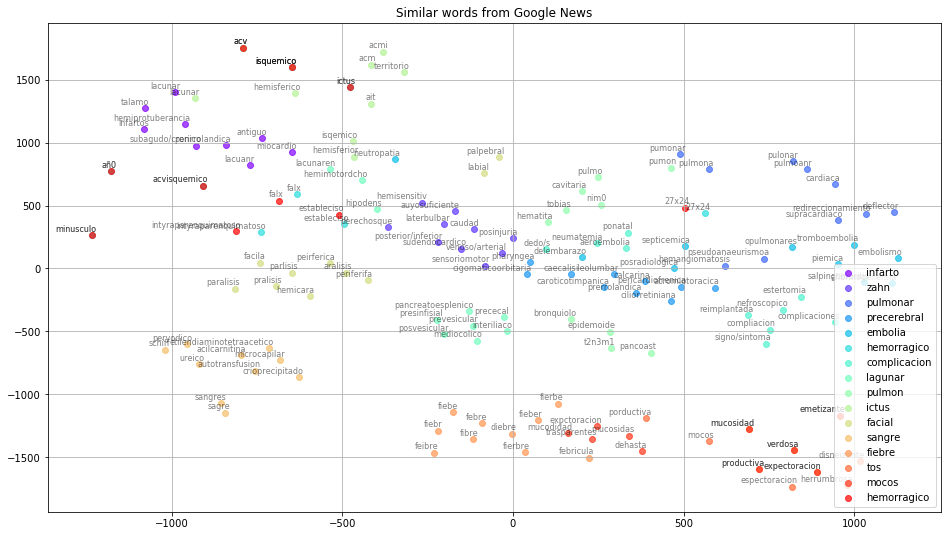

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

### Ejemplo 2. Visualización:

In [66]:
keys=[]
words_ak = []
embeddings_ak = []

for i in range(len(result)):
    keys.append(result[i][0].split('|')[1])

for i in range(len(keys)):
    key = keys[i].split()
    lst, _= similares(key, jer='all',nMax=2)
    for similar_word in lst:    
        #print(similar_word[0].split('|')[1])
        #print('---------------------------')
        #print(vectorSnomed(similar_word[0].split('|')[1].split(),w2vModel,300))
        #print('==========================')
        words_ak.append(similar_word[0].split('|')[1])        
        embeddings_ak.append(vectorSnomed(similar_word[0].split('|')[1].split(),w2vModel,300))
        
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

In [ ]:
words_ak = []
embeddings_ak = []
for word in list(w2vModel.wv.vocab):
    embeddings_ak.append(w2vModel.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

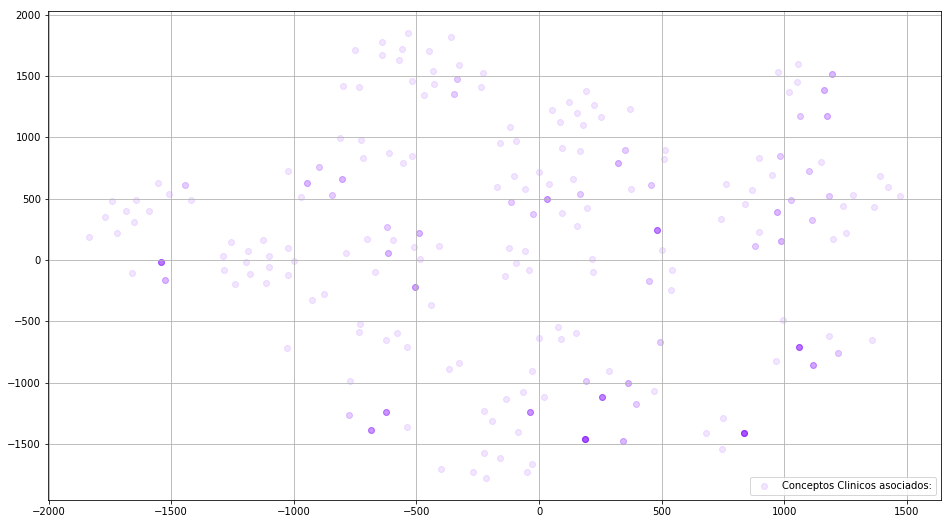

In [67]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Conceptos Clinicos asociados:', embeddings_ak_2d, a=0.1)

### Ejemplo 3. Visualización:

In [ ]:
words_wp = []
embeddings_wp = []
for word in list(model_wp.wv.vocab):
    embeddings_wp.append(model_wp.wv[word])
    words_wp.append(word)

In [68]:
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_ak)

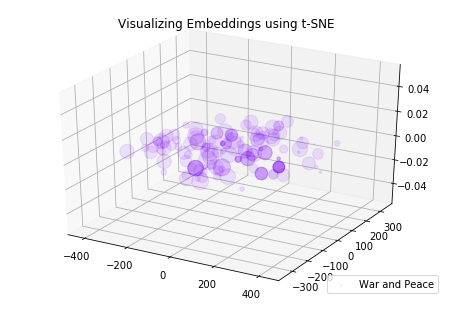

In [69]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'War and Peace', embeddings_wp_3d, a=0.1)

### Ejemplo 4. Visualización:

In [28]:
result

[('57054005|infarto agudo miocardio|Hallazgo clínico', 1.0),
 ('233838001|infarto agudo miocardio posterior|Hallazgo clínico',
  0.9627053737640381),
 ('55470003|infarto agudo|Estructura corporal', 0.9350728392601013),
 ('428752002|infarto miocardio reciente|Situación con contexto explícito',
  0.9322499632835388),
 ('399211009|antecedente infarto miocardio|Situación con contexto explícito',
  0.9179897308349609),
 ('85844000|infarto transparietal|Estructura corporal', 0.8925144672393799),
 ('287292009|reseccion infarto miocardio|Procedimiento', 0.8745330572128296),
 ('113155009|educacion infarto miocardio|Procedimiento', 0.8723424077033997),
 ('737438001|plan manejo clinico infarto miocardio|Objeto físico',
  0.8287302255630493),
 ('119377007|muestra miocardio|Espécimen', 0.7539552450180054),
 ('251272004|espesor miocardio|Entidad observable', 0.7342451810836792),
 ('119377007|especimen miocardio|Espécimen', 0.6816318035125732),
 ('18131002|agudo fulminante|Calificador', 0.67577362060

In [29]:
result[1][0].split('|')[1]

'infarto agudo miocardio posterior'

In [30]:
result[1][0].split('|')[1].split()

['infarto', 'agudo', 'miocardio', 'posterior']

In [ ]:
vectorSnomed(result[1][0].split('|')[1].split(),w2vModel,300)

In [ ]:
"""        
    keys=[]
    words_ak = []
    embeddings_ak = []

    for i in range(len(result)):
        keys.append(result[i][0].split('|')[1])

    for i in range(len(keys)):
        key = keys[i].split()
        lst, _= similares(key, jer='all',nMax=2)
        for similar_word in lst:    
            #print(similar_word[0].split('|')[1])
            #print('---------------------------')
            #print(vectorSnomed(similar_word[0].split('|')[1].split(),w2vModel,300))
            #print('==========================')
            labels.append(similar_word[0].split('|')[1])        
            tokens.append(vectorSnomed(similar_word[0].split('|')[1].split(),w2vModel,300))
""" 

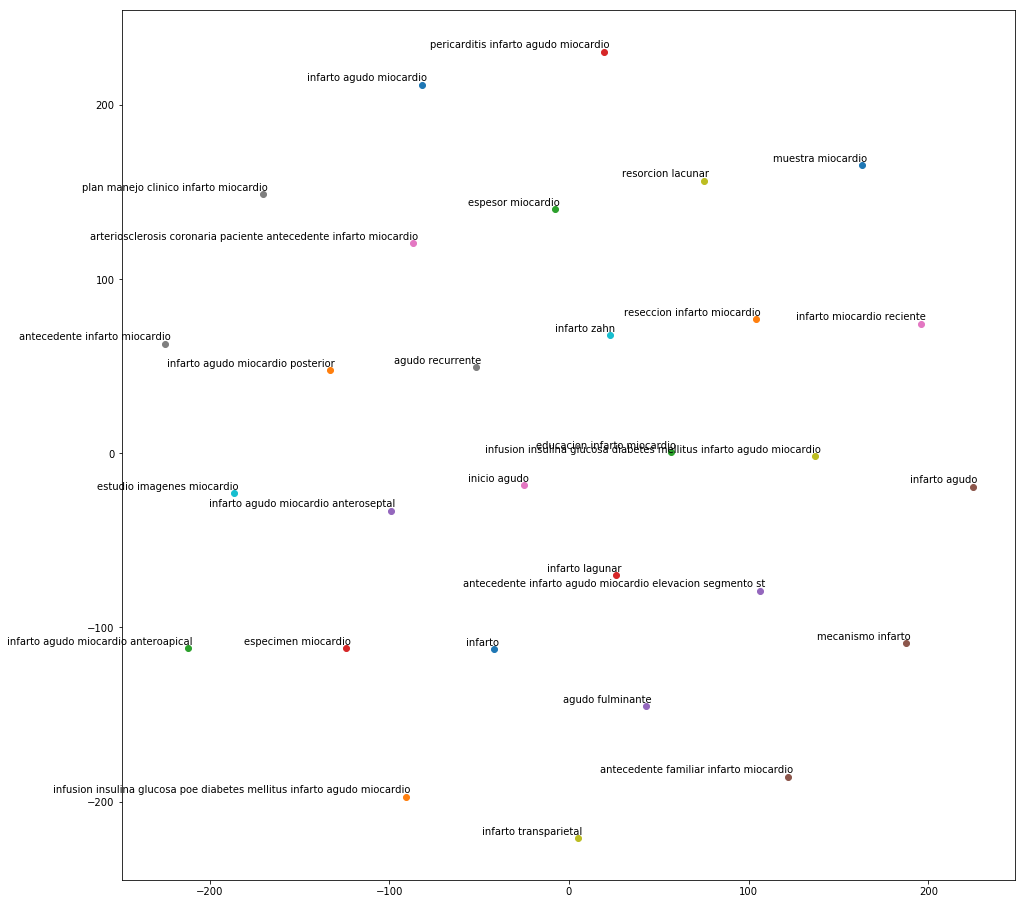

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for i in range(len(result)):
        tokens.append(vectorSnomed(result[i][0].split('|')[1].split(),w2vModel,300))
        labels.append(result[i][0].split('|')[1])
     
        
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(w2vModel)

## 6.  (Tools) Similaridad, utilizados como base para los nuevos métodos: (ANEXOS)

In [45]:
def similarity(self, w1, w2):
        """
        Compute cosine similarity between two words.
        Example::
          >>> trained_model.similarity('woman', 'man')
          0.73723527
          >>> trained_model.similarity('woman', 'woman')
          1.0
        """
        return dot(matutils.unitvec(self[w1]), matutils.unitvec(self[w2]))

In [180]:
# Funcion similitud Distancia del Coseno, Parametros Vectores
def vSimilar(wv1,wv2):
    return np.nan_to_num((round(float(np.dot(wv1, wv2)/(np.linalg.norm(wv1) * np.linalg.norm(wv2))),4)))

In [7]:
# Calcula los n-gramas, segun una lista de tokens, valor n
def ngrams(listTokens, n):
    output = []  
    for i in range(len(listTokens)-n+1):
        output.append(listTokens[i:i+n])
    return output

In [8]:
# Crea todos los n-gramas de una frase según (n)
#Salida: lista de n-gramas desde 1 hasta n
def todosGramas(listTokens,n):
    output=[]
    buffer=[]
    for i in range(n):
        i+=1
        output.append(ngrams(listTokens, i))
    for i in range(n):
        buffer+= output[i]
    return buffer

In [9]:
# Entrada: Lista de gramas ['1-grama','2-grama',['3-grama','4-grama]]
from nltk.util import skipgrams

def skipgramas(frase,n,k):
    return(skipgrams(sent, n, k))

### 6.1 Crear Vector para cada token de la frase.
Generación de los vectores de los tokens de cada frase.<br>
* Funcion **creaVector(frase, size)**, genera un vector por cada token de la frase.
    * Entrada: lista de tokens de la **frase** y **size**, tamaño del vector generado según modelo W2V (300 o 100)
    * Salida: lista con los vectores de cada token, de la frase

* Funcion: **vectorTotal(listGramas, size)**
    * Entrada: **listGramas**, lista de n-gramas generados, **size**, tamaño del vector, según modelo W2V.
    * Salida: Vectores asociados a cada frase, si es 1-grama -> Salida Vector(token).<br>
      Si la frase tiene **n** gramas -> Salida $$(V[p]=v[tk_{1}]+v[tk_{2}]+...+v[tk_{n}])$$

### 6.2. Crear los vectores para todos los ngramas generados:

In [30]:
# Entrada: lista de Frase, con ngramas en sublistas
# Ejemplo: todosGramas(textP13,3) 
# Entrada: ['fiebre','gripe','tos']
# Salida: [['fiebre'],['gripe'],['tos'],['fiebre', 'gripe'], ['gripe', 'tos'],['fiebre', 'gripe', 'tos']]

def vectorTotal(lstgrams,size):
    output=[]
    for item in lstgrams:
        buffer=np.zeros((size,), dtype=np.float32)
        for w in item:
            try:
                buffer = buffer + w2v_InfAltaSK.word_vec(w)
            except:
                # Si el token no está en el vocabulario del Modelo, se descarta todos los ngramas
                buffer = buffer + np.zeros((size,), dtype=np.float32)
                #break
        output.append((item, buffer))
    return output

### 6.3. Función de Similitud. Snomed2Vec.Most_Similar(), distancia levenshtein(): 
Función de Similitud, cuando se le pasa los vectores generados. Utilizando la Distancia del Coseno.

In [42]:
# Funcion similitud Distancia del Coseno, Parametros Vectores
def vSimilar(wv1,wv2):
    return np.nan_to_num((round(float(np.dot(wv1, wv2)/(np.linalg.norm(wv1) * np.linalg.norm(wv2))),4)))

In [ ]:
def levenshtein(first, second):
    """Return the Levenshtein distance between two strings.
    Based on:
        http://rosettacode.org/wiki/Levenshtein_distance#Python
        implementing at: https://github.com/coloratto/TextRank/blob/master/textrank/__init__.py
    """
    if len(first) > len(second):
        first, second = second, first
    distances = range(len(first) + 1)
    for index2, char2 in enumerate(second):
        new_distances = [index2 + 1]
        for index1, char1 in enumerate(first):
            if char1 == char2:
                new_distances.append(distances[index1])
            else:
                new_distances.append(1 + min((distances[index1],
                                             distances[index1 + 1],
                                             new_distances[-1])))
        distances = new_distances
    return distances[-1]

In [43]:
def masCercana(w):
    cerca=[]
    try:
        cerca=w2v_InfAltaSK.most_similar(w)
    except:
        cerca=[]
    return cerca

In [44]:
def cercanos(sent,n):
    simConcept=[]
    for w in sent:
        buffer = masCercana(w)
        if len(masCercana(w))>1:
            for i in range(n):
                simConcept.append(buffer[i][0])
    return simConcept